<a href="https://colab.research.google.com/github/iashyam/Computation-QM/blob/main/Time_evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy.linalg as lin 
import math
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-whitegrid')

# __Problem__:
A beam of electrons with energy $5 eV$ approaches a potential barrier with height $10eV$ and width $1nm$ Calculate the transmission cofficient. Conpare it with the theoritical value.

## Step1: Nondimessionlisation

We the width of the potential barrier as the natural length scale so:

$l_0 = 1\times 10^{-9} m$

Then we have the natural energy salce as:

$$\varepsilon  = \frac{\hbar^2}{2ml_0^2}$$

So the scrodinger equation becomes 
\begin{equation}
\iota \frac{\partial \Phi}{\partial \tau} = -\frac{\hbar^2}{2m}\frac{\partial^2 \Phi}{\partial y^2} + V(x)\Phi
\end{equation}

With potential as 
\begin{equation}
V(x) =
\begin{cases}
 V_o & |x| < a \\
 0 & \text{elsewhere}
\end{cases}
\end{equation}

## Time Evolution

For a given state $\Phi_0(x,0)$ we can calculate the wave funciton at any time

\begin{equation}
\Phi(x,t) = \sum_{n = 0}^{\infty}C_n \phi_n e^{-\iota E_n t/\hbar}
\end{equation}

Where 

\begin{equation}
C_n = \sum_{n = 0}^{\infty}\Phi(x,0) \phi_n 
\end{equation}

In [ ]:
h = 1.05e-34
m = 9.1e-31
l0 = 1e-9
E = h**2/(2*m*(l0**2))
eV = 1.6e-19
V0 =  5*eV/E
p0 = h/l0
E0 = 10*eV/E
P = np.sqrt(2*m*E0)
# po = P/p0
po

14.536216402543934

In [ ]:
N = 500 #number of lattice points
l = 30
ys = np.linspace(-l,l,2*N) #descretising the space
delta = ys[1]-ys[0]

In [ ]:
#potential function
def V(x):
    return  V0 if  x>-0.5 and x<0.5 else 0

#kroneker delta function
def k(i,j):
    return 1 if i==j else 0

#hemiltonian function
def Hemiltonian(i,j):
    return -(1/delta**2)*(k(i+1,j)+k(i-1,j)-2*k(i,j)) + V(i*delta)*k(i,j)

In [ ]:
#hamiltonian matrix
H = np.array([[Hemiltonian(i,j) for i in range(-N,N)] for j in range(-N,N)])
eig_values, eig_functions = lin.eig(H)
idx = eig_values.argsort()
eig_values = eig_values[idx]
eig_functions = eig_functions[:,idx]

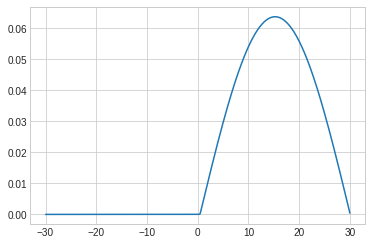

In [ ]:
psi0 = eig_functions[:,1]
plt.plot(ys,psi0)

In [ ]:
a = 1 #intial spread(uncertainily) in natural lenght scale
b = -10 #intial <x> center of the gaussian
#intial wave function
def Psi0(y):
    return 1/pow(np.pi*(a**2),0.25)*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*po*y)

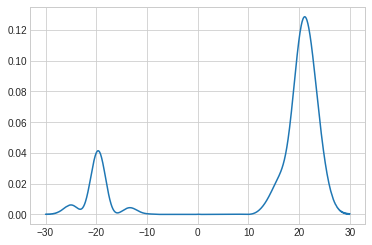

In [ ]:
#time evolution
def Psi(t):
    sum = np.zeros((2*N), dtype='complex')
    for i in range(len(eig_values)):
        cn = np.vdot(Psi0(ys),eig_functions[:,i])
        sum += cn*np.exp(eig_values[i]*1j*t)*eig_functions[:,i]
    return sum

def prob(t):
    return abs(Psi(t))**2

plt.plot(ys, prob(2.8))

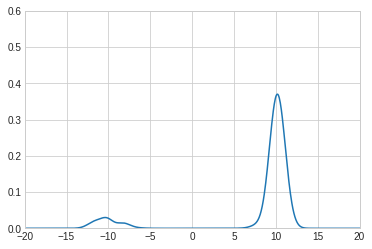

In [ ]:
fig = plt.figure()
ax = plt.axes(ylim=(0,0.6), xlim=(-20,20))

plot, = ax.plot([],[])

def init():
    plot.set_data(ys, prob(0))
    return plot,

def animate(i):
    plot.set_data(ys,prob(i*0.005))
    return plot,

anim = FuncAnimation(fig, animate, init_func = init,frames = 150, interval = 60, blit = True)
anim.save('time_evoluatoin.mp4', writer = 'ffmpeg', fps = 60)

In [ ]:
T = 0
R = 0
Probs = prob(2.8)
Probs_left = Probs[:len(ys)//2]
Probs_right = Probs[len(ys)//2:]
T = 2*sum(Probs_right)/l
R = 2*sum(Probs_left)/l
print(f"T = {T}")
print(f"R = {R} ")
print(f"{T + R }")

T = 0.9117204360546164
R = 0.19827956394539106 
1.1100000000000074


In [ ]:
def Tra(E,V):
    t = (1+V**2/4*E*(E+V))*(math.sin((2*0.5/h)*math.sqrt(2*m*(E+V))))**2
    return 1/t

In [ ]:
Tra(10,5)+T

1.0316656515457947